In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('loan prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

Dataset has 614 rows and 13 columns

In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


Dataset appears to have missing data. 'Loan_Status' is the target column. 'Loan_ID' is of no use,its like an index and can be removed.The other 11 columns are features. 
Columns 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area','Loan_Status','Loan_Amount_Term' are categorical.

This is a classification problem

In [6]:
#Drop 'Loan_ID' column
data.drop(columns='Loan_ID',axis=1,inplace=True)

In [7]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Missing Values

In [9]:
#Check for null values
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As can be seen some of the features have missing values.

In [10]:
data.dropna()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
10,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


If we try dropping the missing values, the number of rows is decreased from 614 to 480 which amounts to data loss. So instead of dropping the rows with missing
values, let us impute them with mean/median/mode depending on whether it is categorical or continous data type

Columns 'Gender','Married','Dependents','Self Employed','Loan_Amount_Term','Credit_History' are categorical, so missing values are to be imputed with mode.

In [11]:
#Fill the missing values with mode
col=['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']
for i in col:
    data[i].fillna(data[i].mode()[0],inplace=True)

Columns 'LoanAmount' is continous, missing values are to be imputed with median

In [12]:
#Fill the missing values with median
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

In [13]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All the missing values are filled

# Data Visualisation

Univariate Analysis

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.6+ KB


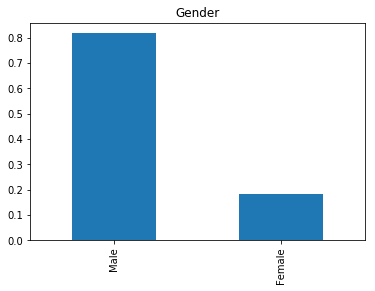

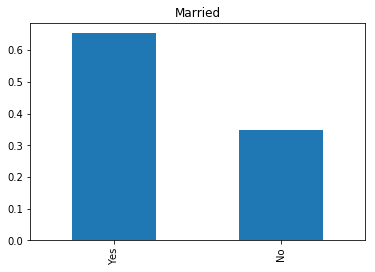

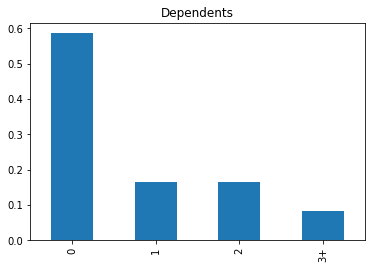

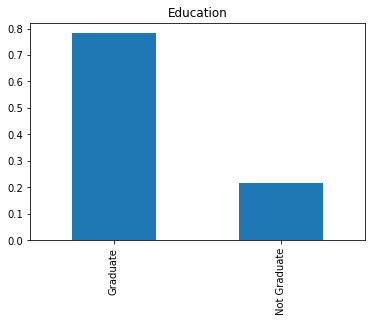

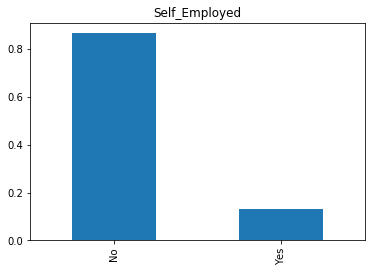

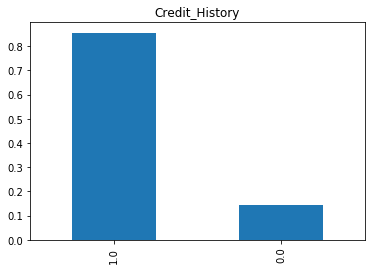

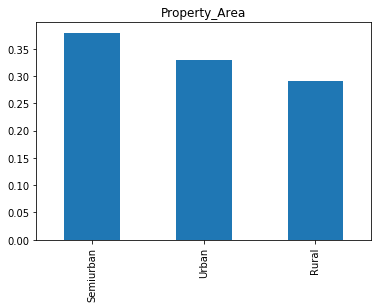

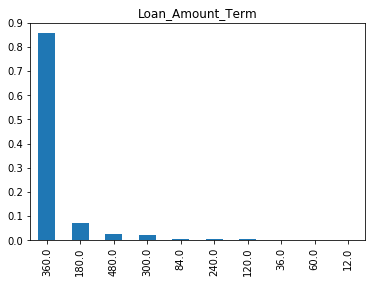

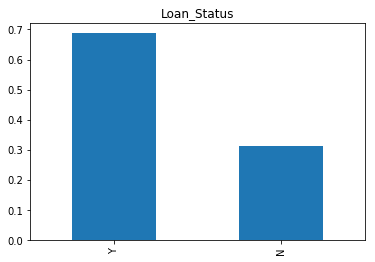

In [15]:
#Plot the proportion of categories for the categorical columns
list=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Amount_Term','Loan_Status']
for i in list:
    plt.subplots(1,1)
    data[i].value_counts(normalize=True).plot(kind='bar')
    plt.title(i)

Observations:
Difference between number of males and females is more in the dataset.

There are more number of males. More number of married people. Majority of the applicants have no dependents which is in contrast to the previous point.

Majority of the applicants are graduates.Self employed applicants are less.

Applicants are almost equally distributed among semiurban,urban and rural areas.



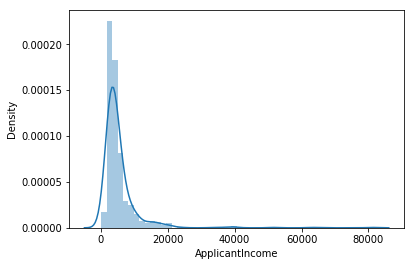

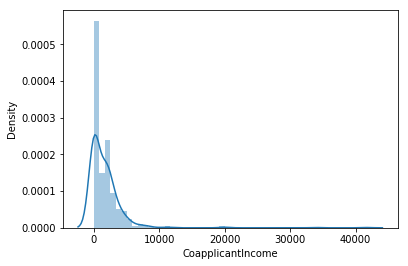

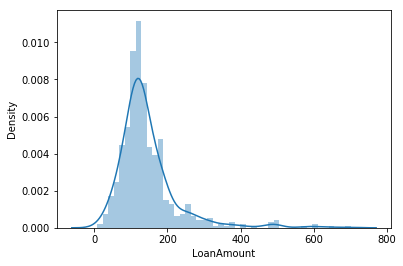

In [16]:
#Plot the distribution plots for continous variables
list_cont=['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in list_cont:
    plt.subplots(1,1)
    sns.distplot(data[i],kde=True)
    

All the columns appear to be normally distributed, the data is skewed.

Check For outliers

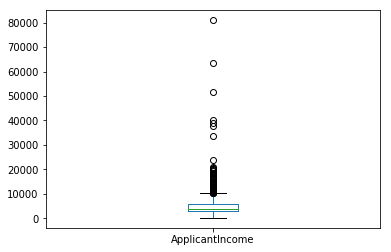

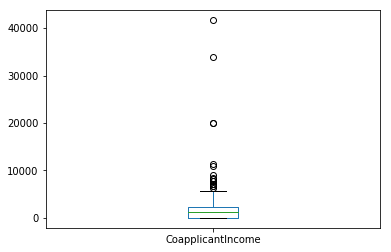

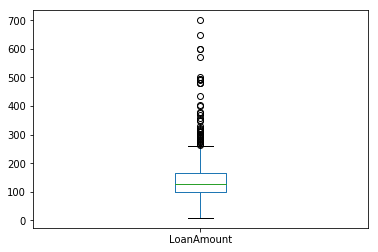

In [17]:
for i in list_cont:
    plt.subplots(1,1)
    data[i].plot.box()

There are many outliers in the data, which are to be removed.

Bivariate Analysis

Let us study the effect of different features on target variable.

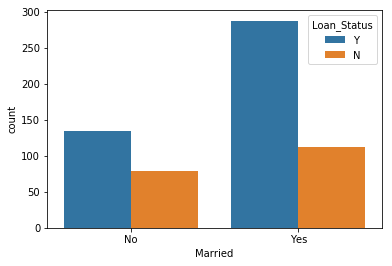

In [18]:
sns.countplot(x=data['Married'],hue=data['Loan_Status'])

More number of married people got their loan approved

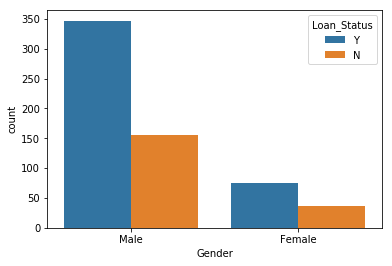

In [19]:
sns.countplot(x=data['Gender'],hue=data['Loan_Status'])

Though the number of approved male applicants is more, we have to consider the fact that there are more number of male apllicants than female applicants

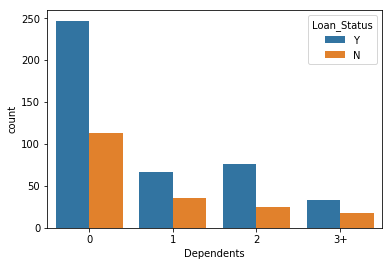

In [20]:
sns.countplot(x=data['Dependents'],hue=data['Loan_Status'])

As expected, loan approvals for people with no dependents is more

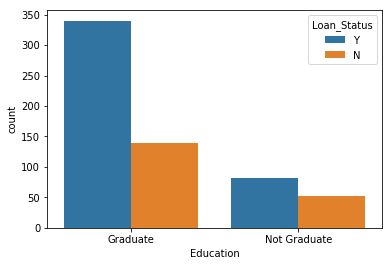

In [21]:
sns.countplot(x=data['Education'],hue=data['Loan_Status'])

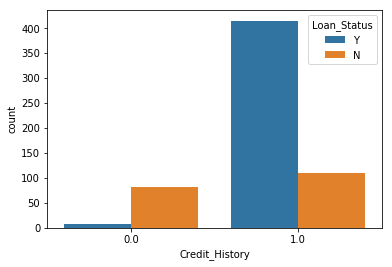

In [22]:
sns.countplot(x=data['Credit_History'],hue=data['Loan_Status'])

Loan approvals are more for people with good credit history .

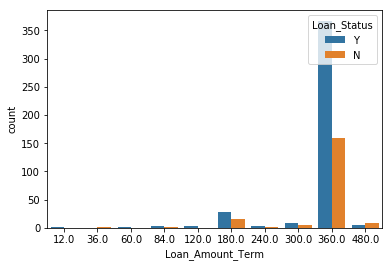

In [23]:
sns.countplot(x=data['Loan_Amount_Term'],hue=data['Loan_Status'])

Most common term among the loan approvals is 30yrs.

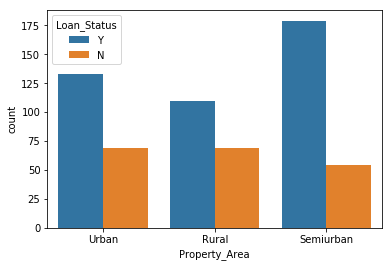

In [24]:
sns.countplot(x=data['Property_Area'],hue=data['Loan_Status'])

Loan approvals are slightly more in suburban areas.Overall loan approval is not that dependent on the area.

# Encoding of Target column

In [25]:
#Use LabelEncoder for target column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Loan_Status']=le.fit_transform(data['Loan_Status'])

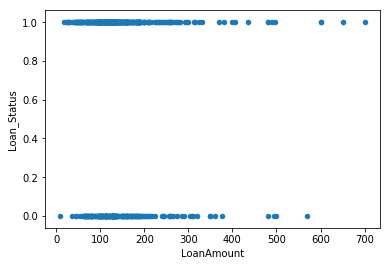

In [26]:

data.plot(x='LoanAmount',y='Loan_Status',kind='scatter')

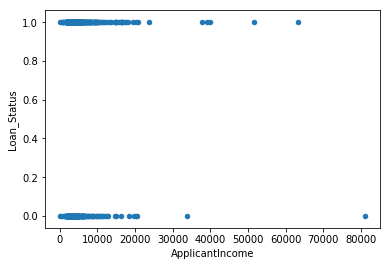

In [27]:
data.plot(x='ApplicantIncome',y='Loan_Status',kind='scatter')

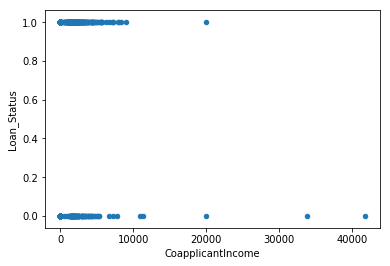

In [28]:
data.plot(x='CoapplicantIncome',y='Loan_Status',kind='scatter')

Nothing much can be infered from these plots

# Encoding

All the categorical variables are to be encoded.

In [29]:
#Use get_dummies to convert the nominal categorical data to numericals
data_dummies=[]
for j in ['Gender','Married','Education','Self_Employed','Credit_History','Property_Area']:
    data_dummies.append(pd.get_dummies(data[j],drop_first=True, prefix = j, prefix_sep = ':'))
data_dummies=pd.concat(data_dummies,axis=1)

In [30]:
data=pd.concat([data,data_dummies],axis=1)

In [31]:
data.drop(columns=['Gender','Married','Education','Self_Employed','Credit_History','Property_Area'],axis=1,inplace=True)

In [32]:
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [33]:
#Make the category '3+' as 3 in 'Dependents' column
data['Dependents']=data['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

In [34]:
data.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender:Male,Married:Yes,Education:Not Graduate,Self_Employed:Yes,Credit_History:1.0,Property_Area:Semiurban,Property_Area:Urban
0,0,5849,0.0,128.0,360.0,1,1,0,0,0,1,0,1
1,1,4583,1508.0,128.0,360.0,0,1,1,0,0,1,0,0
2,0,3000,0.0,66.0,360.0,1,1,1,0,1,1,0,1
3,0,2583,2358.0,120.0,360.0,1,1,1,1,0,1,0,1
4,0,6000,0.0,141.0,360.0,1,1,0,0,0,1,0,1
5,2,5417,4196.0,267.0,360.0,1,1,1,0,1,1,0,1
6,0,2333,1516.0,95.0,360.0,1,1,1,1,0,1,0,1
7,3,3036,2504.0,158.0,360.0,0,1,1,0,0,0,1,0
8,2,4006,1526.0,168.0,360.0,1,1,1,0,0,1,0,1
9,1,12841,10968.0,349.0,360.0,0,1,1,0,0,1,1,0


In [35]:
data['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [36]:
#Convert the 'Loan_Amount_Term' in months to yrs
data['Loan_Amount_Term']=data['Loan_Amount_Term'].replace({12.0:0,36.0:1,60.0:2,84.0:3,120.0:4,180.0:5,240.0:6,300.0:7,360.0:8,480.0:9})

In [37]:
data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender:Male,Married:Yes,Education:Not Graduate,Self_Employed:Yes,Credit_History:1.0,Property_Area:Semiurban,Property_Area:Urban
0,0,5849,0.0,128.0,8.0,1,1,0,0,0,1,0,1
1,1,4583,1508.0,128.0,8.0,0,1,1,0,0,1,0,0
2,0,3000,0.0,66.0,8.0,1,1,1,0,1,1,0,1
3,0,2583,2358.0,120.0,8.0,1,1,1,1,0,1,0,1
4,0,6000,0.0,141.0,8.0,1,1,0,0,0,1,0,1


In [38]:
data.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender:Male,Married:Yes,Education:Not Graduate,Self_Employed:Yes,Credit_History:1.0,Property_Area:Semiurban,Property_Area:Urban
Dependents,1.000000,0.118202,0.030430,0.163103,-0.096377,0.010118,0.172914,0.334216,0.055752,0.056798,-0.040160,0.001924,-0.001198
ApplicantIncome,0.118202,1.000000,-0.116605,0.565181,-0.038808,-0.004710,0.058809,0.051708,-0.140760,0.127180,-0.018615,-0.014246,-0.000598
CoapplicantIncome,0.030430,-0.116605,1.000000,0.189218,-0.052472,-0.059187,0.082912,0.075948,-0.062290,-0.016100,0.011134,-0.027044,0.022776
LoanAmount,0.163103,0.565181,0.189218,1.000000,0.037691,-0.033214,0.106904,0.146546,-0.168759,0.115100,-0.000607,-0.005804,-0.036050
Loan_Amount_Term,-0.096377,-0.038808,-0.052472,0.037691,1.000000,-0.005679,-0.065494,-0.082642,-0.076414,-0.029184,-0.002379,0.052733,-0.099726
Loan_Status,0.010118,-0.004710,-0.059187,-0.033214,-0.005679,1.000000,0.017987,0.091478,-0.085884,-0.003700,0.540556,0.136540,-0.043621
Gender:Male,0.172914,0.058809,0.082912,0.106904,-0.065494,0.017987,1.000000,0.364569,0.045364,-0.000525,0.009170,-0.108623,0.034530
Married:Yes,0.334216,0.051708,0.075948,0.146546,-0.082642,0.091478,0.364569,1.000000,0.012304,0.004489,0.010938,0.005845,0.000546
Education:Not Graduate,0.055752,-0.140760,-0.062290,-0.168759,-0.076414,-0.085884,0.045364,0.012304,1.000000,-0.010383,-0.073658,-0.039410,-0.034279
Self_Employed:Yes,0.056798,0.127180,-0.016100,0.115100,-0.029184,-0.003700,-0.000525,0.004489,-0.010383,1.000000,-0.001550,0.008710,-0.030338


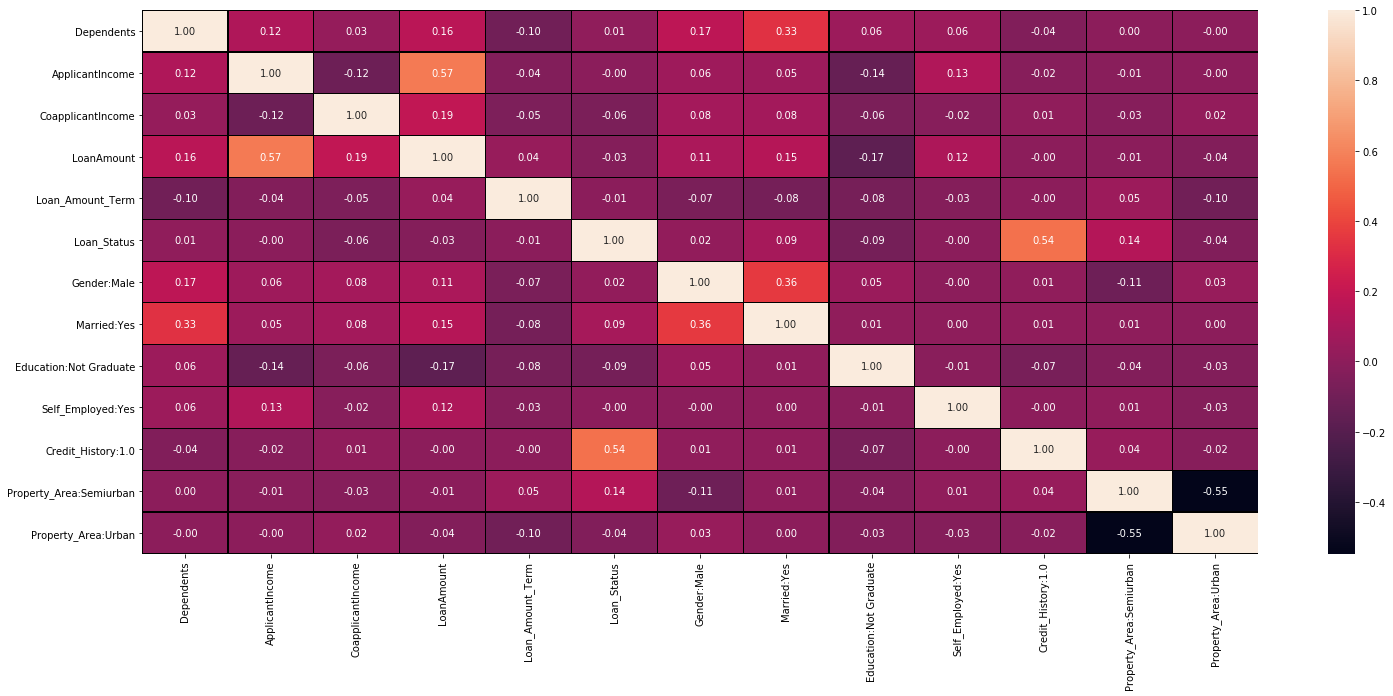

In [39]:
plt.figure(figsize=(25,10))
sns.heatmap(data.corr(),annot=True,linewidth=0.1,linecolor='Black',fmt='0.2f')

Nothing much can be infered from the heatmap.Except for 'Credit_History' other columns are not exhibiting much correlation with 'Loan_Status'. No multicollinearity is there among independent variables.

# Outlier Removal

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(data))
data_new=data[(z<3).all(axis=1)]

In [41]:
data.shape

(614, 13)

In [42]:
data_new.shape

(577, 13)

In [43]:
(614-577)/577

0.06412478336221837

6% data loss is slightly higher but is acceptable.

In [45]:
#Check the skewness after outlier removal
data_new.skew()

Dependents                 1.052106
ApplicantIncome            2.148522
CoapplicantIncome          1.350517
LoanAmount                 1.151525
Loan_Amount_Term          -2.818252
Loan_Status               -0.822635
Gender:Male               -1.622920
Married:Yes               -0.630211
Education:Not Graduate     1.306588
Self_Employed:Yes          2.252848
Credit_History:1.0        -1.976043
Property_Area:Semiurban    0.512963
Property_Area:Urban        0.736780
dtype: float64

Skewness removal has to be done on the continous data columns 'ApplicantIncome','CoapplicantIncome','LoanAmount'.Taking +/-0.65 as threshold,
they are skewed.

In [46]:
#Apply log transformation on the continous columns
for i in list_cont:
    data_new[i]=np.log(data_new[i]+1)

In [47]:
data_new.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender:Male,Married:Yes,Education:Not Graduate,Self_Employed:Yes,Credit_History:1.0,Property_Area:Semiurban,Property_Area:Urban
0,0,8.674197,0.000000,4.859812,8.0,1,1,0,0,0,1,0,1
1,1,8.430327,7.319202,4.859812,8.0,0,1,1,0,0,1,0,0
2,0,8.006701,0.000000,4.204693,8.0,1,1,1,0,1,1,0,1
3,0,7.857094,7.765993,4.795791,8.0,1,1,1,1,0,1,0,1
4,0,8.699681,0.000000,4.955827,8.0,1,1,0,0,0,1,0,1
5,2,8.597482,8.342125,5.590987,8.0,1,1,1,0,1,1,0,1
6,0,7.755339,7.324490,4.564348,8.0,1,1,1,1,0,1,0,1
7,3,8.018625,7.826044,5.068904,8.0,0,1,1,0,0,0,1,0
8,2,8.295798,7.331060,5.129899,8.0,1,1,1,0,0,1,0,1
10,2,8.071219,6.552508,4.262680,8.0,1,1,1,0,0,1,0,1


In [48]:
data_new.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender:Male,Married:Yes,Education:Not Graduate,Self_Employed:Yes,Credit_History:1.0,Property_Area:Semiurban,Property_Area:Urban
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,0.719237,8.292204,4.324704,4.831330,7.776430,0.689775,0.814558,0.649913,0.227036,0.126516,0.850953,0.376083,0.327556
std,0.995229,0.555009,3.839091,0.423901,0.814537,0.462987,0.388993,0.477411,0.419280,0.332719,0.356444,0.484822,0.469729
min,0.000000,5.017280,0.000000,2.302585,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.949444,0.000000,4.615121,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,8.229778,7.135687,4.859812,8.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,8.618485,7.720462,5.081404,8.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,3.000000,9.936342,9.102867,5.942799,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
data_new.skew()

Dependents                 1.052106
ApplicantIncome           -0.204913
CoapplicantIncome         -0.216757
LoanAmount                -0.669196
Loan_Amount_Term          -2.818252
Loan_Status               -0.822635
Gender:Male               -1.622920
Married:Yes               -0.630211
Education:Not Graduate     1.306588
Self_Employed:Yes          2.252848
Credit_History:1.0        -1.976043
Property_Area:Semiurban    0.512963
Property_Area:Urban        0.736780
dtype: float64

As can be seen, skewness is removed to large extent from the continous columns after doing Log Transformation. 

Also Scaling is not required.

# Fitting Models

In [50]:
#Split the data into features and target variables
x=data_new.drop(columns='Loan_Status',axis=1)
y=data_new['Loan_Status']

In [138]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score

# Logistic Regression

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=108)
lgr=LogisticRegression()
lgr.fit(x_train,y_train)
pred=lgr.predict(x_test)
print('accuracy score',accuracy_score(y_test,pred))
print('confusion matrix',confusion_matrix(y_test,pred))
print('classification report',classification_report(y_test,pred))

accuracy score 0.8103448275862069
confusion matrix [[ 18  29]
 [  4 123]]
classification report               precision    recall  f1-score   support

           0       0.82      0.38      0.52        47
           1       0.81      0.97      0.88       127

    accuracy                           0.81       174
   macro avg       0.81      0.68      0.70       174
weighted avg       0.81      0.81      0.78       174



Cross Validation

In [53]:
score=cross_val_score(lgr,x,y,cv=8)
print(score.mean(),'difference b/w accuracy score and cv score is ',round(accuracy_score(y_test,pred)-score.mean(),3))


0.8162813926940639 difference b/w accuracy score and cv score is  -0.006


# Decision Tree Classifier

In [54]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('accuracy score',accuracy_score(y_test,pred))
print('confusion matrix',confusion_matrix(y_test,pred))
print('classification report',classification_report(y_test,pred))

accuracy score 0.7068965517241379
confusion matrix [[ 22  25]
 [ 26 101]]
classification report               precision    recall  f1-score   support

           0       0.46      0.47      0.46        47
           1       0.80      0.80      0.80       127

    accuracy                           0.71       174
   macro avg       0.63      0.63      0.63       174
weighted avg       0.71      0.71      0.71       174



Cross Validation

In [55]:
score=cross_val_score(dtc,x,y,cv=8)
print(score.mean(),'difference b/w accuracy score and cv score is ',round(accuracy_score(y_test,pred)-score.mean(),3))


0.7226740867579908 difference b/w accuracy score and cv score is  -0.016


# Support Vector  Machine Classifier

In [56]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
pred=svc.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score 0.8218390804597702
[[ 18  29]
 [  2 125]]
              precision    recall  f1-score   support

           0       0.90      0.38      0.54        47
           1       0.81      0.98      0.89       127

    accuracy                           0.82       174
   macro avg       0.86      0.68      0.71       174
weighted avg       0.84      0.82      0.79       174



In [57]:
score=cross_val_score(svc,x,y,cv=8)
print(score.mean(),'difference b/w accuracy score and cv score is ',round(accuracy_score(y_test,pred)-score.mean(),3))


0.818017503805175 difference b/w accuracy score and cv score is  0.004


# Random Forest Classifier

In [58]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


0.7758620689655172
[[ 19  28]
 [ 11 116]]
              precision    recall  f1-score   support

           0       0.63      0.40      0.49        47
           1       0.81      0.91      0.86       127

    accuracy                           0.78       174
   macro avg       0.72      0.66      0.67       174
weighted avg       0.76      0.78      0.76       174



Cross Validation

In [60]:
score=cross_val_score(rf,x,y,cv=8)
print(score.mean(),'difference b/w accuracy score and cv score is ',round(accuracy_score(y_test,pred)-score.mean(),3))


0.7937595129375952 difference b/w accuracy score and cv score is  -0.018


# XG Boost Classifier

In [61]:
xgb=XGBClassifier(objective='binary:logistic')
xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


[12:15:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7931034482758621
[[ 25  22]
 [ 14 113]]
              precision    recall  f1-score   support

           0       0.64      0.53      0.58        47
           1       0.84      0.89      0.86       127

    accuracy                           0.79       174
   macro avg       0.74      0.71      0.72       174
weighted avg       0.78      0.79      0.79       174



In [62]:
score=cross_val_score(xgb,x,y,cv=8)
print(score.mean(),'difference b/w accuracy score and cv score is ',round(accuracy_score(y_test,pred)-score.mean(),3))


[12:15:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:15:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:15:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:15:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

# It can be seen that Support Vector Machine Classifier has the least difference between accuracy score and cv score. This is choosen as the 
final model and hyper parameter tuning is done.

# Support Vector Machine Classifier Hyperparameter Tuning

In [63]:
from sklearn.model_selection import GridSearchCV
params={'C':[0.01,0.1,1,10,100],'kernel':['linear','poly','rbf','sigmoid'],'degree':[2,3,4,5],'gamma':['scale','auto'],'class_weight':['balanced',None]}
model=SVC()
grid=GridSearchCV(estimator=model,param_grid=params,cv=5)
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)


0.8180809595202397
{'C': 0.01, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}


Fit the data with above parameters

In [68]:
svc=SVC(C=0.01,class_weight='balanced',degree=2,gamma='auto',kernel='poly',probability=True)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
pred=svc.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score 0.8218390804597702
[[ 18  29]
 [  2 125]]
              precision    recall  f1-score   support

           0       0.90      0.38      0.54        47
           1       0.81      0.98      0.89       127

    accuracy                           0.82       174
   macro avg       0.86      0.68      0.71       174
weighted avg       0.84      0.82      0.79       174



Accuracy score is slightly improved.

In [65]:
score=cross_val_score(svc,x,y,cv=8)
print(score.mean(),'difference b/w accuracy score and cv score is ',round(accuracy_score(y_test,pred)-score.mean(),3))


0.818017503805175 difference b/w accuracy score and cv score is  0.004


# AUC- ROC Curve

In [69]:
y_pred_prob=svc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

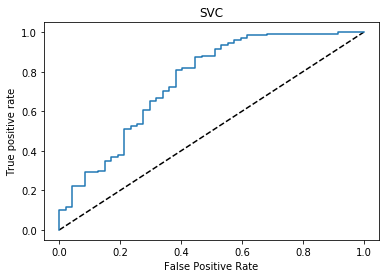

In [70]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVC')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive rate')
plt.title('SVC')
plt.show()

In [72]:
auc_score=roc_auc_score(y_test,svc.predict(x_test))
auc_score

0.6836153459540961

# Saving The Model

In [73]:
import joblib
joblib.dump(svc,'svcfile.obj')
lir_from_joblib=joblib.load('svcfile.obj')
lir_from_joblib.predict(x_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [74]:
lir_from_joblib.score(x_test,y_test)

0.8218390804597702